In [82]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor
import seaborn as sns

In [3]:
df_nonoverlapping_01 = pd.read_csv('../data/nonoverlapping/img_0_1.csv', index_col=0)
df_nonoverlapping_012 = pd.read_csv('../data/nonoverlapping/img_0_1_2.csv', index_col=0)
df_overlapping_01 = pd.read_csv('../data/overlapping/image01.csv', index_col=0)
df_overlapping_012 = pd.read_csv('../data/overlapping/image012.csv', index_col=0)

In [38]:
#helper function

#generate train test split
def gen_train_test(df):
    x = df.iloc[:,:64]
    y = df['label']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
    return x_train, x_test, y_train, y_test

#generate label
def gen_label_en(df):  
    df['img'] = df['img'].astype(str)
    label = preprocessing.LabelEncoder()
    df['label'] = label.fit_transform(df['img'].values.tolist())
    return df

#generate histogram
def gen_histo(df, col1:str, col2:str, title:str):
    fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
    axs[0].hist(df[col1])
    axs[0].title.set_text(str(title+" feature: "+col1))
    axs[1].hist(df[col2])
    axs[1].title.set_text(str(title+" feature: "+col2))
    fig.tight_layout()
    return plt.show()
  
#generate scatter plot
def gen_scatter(df1, df2, col1:str, col2:str, title:str):
    df1['type'] = 'test'
    df2['type'] = 'train'
    df = pd.concat([df1,df2])
    sns.scatterplot( df[col1], df[col2], hue=df['type'])
    plt.title(title)
    return plt.show()

In [6]:
df_nonoverlapping_01 = gen_label_en(df_nonoverlapping_01)
df_nonoverlapping_012 = gen_label_en(df_nonoverlapping_012)
df_overlapping_01 = gen_label_en(df_overlapping_01)
df_overlapping_012 = gen_label_en(df_overlapping_012)

In [99]:
x_train_nonover_01, x_test_nonover_01, y_train_nonover_01, y_test_nonover_01 = gen_train_test(df_nonoverlapping_01)
x_train_nonover_012, x_test_nonover_012, y_train_nonover_012, y_test_nonover_012 = gen_train_test(df_nonoverlapping_012)


x_train_over_01, x_test_over_01, y_train_over_01, y_test_over_01 = gen_train_test(df_overlapping_01)
x_train_over_012, x_test_over_012, y_train_over_012, y_test_over_012 = gen_train_test(df_overlapping_012)

### Histgram

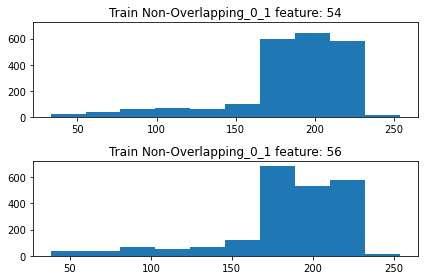

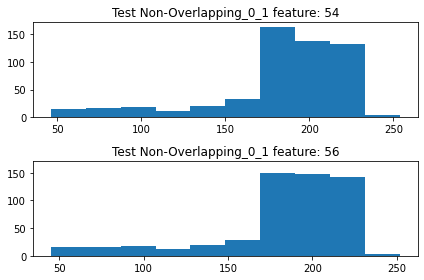

In [9]:
gen_histo(x_train_nonover_01, '54', '56', 'Train Non-Overlapping_0_1')
gen_histo(x_test_nonover_01, '54', '56', 'Test Non-Overlapping_0_1')

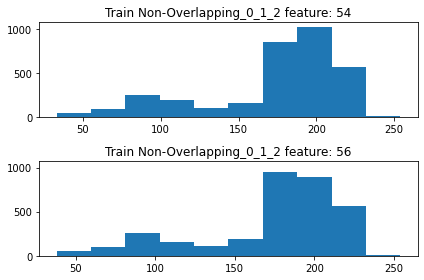

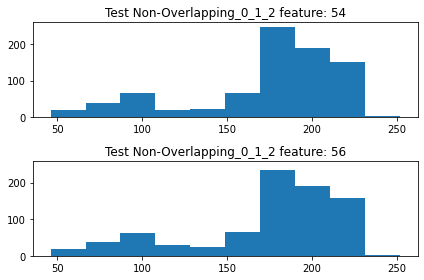

In [10]:
gen_histo(x_train_nonover_012, '54', '56', 'Train Non-Overlapping_0_1_2')
gen_histo(x_test_nonover_012, '54', '56', 'Test Non-Overlapping_0_1_2')

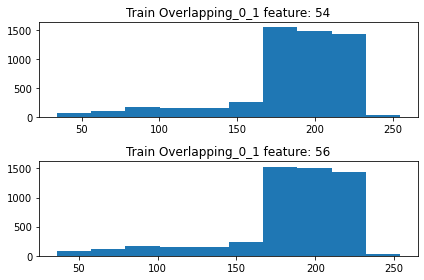

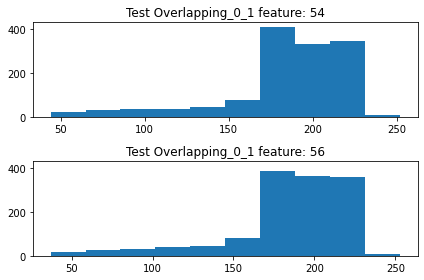

In [11]:
gen_histo(x_train_over_01, '54', '56', 'Train Overlapping_0_1')
gen_histo(x_test_over_01, '54', '56', 'Test Overlapping_0_1')

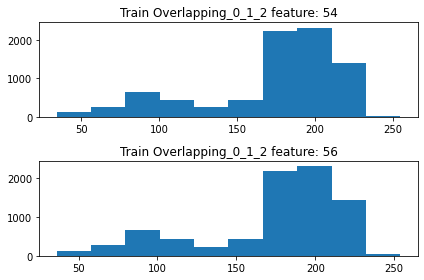

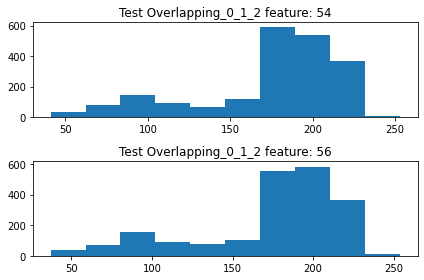

In [12]:
gen_histo(x_train_over_012, '54', '56', 'Train Overlapping_0_1_2')
gen_histo(x_test_over_012, '54', '56', 'Test Overlapping_0_1_2')

### Scatter Plot

2021-10-25 16:03:56,702 [1437] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



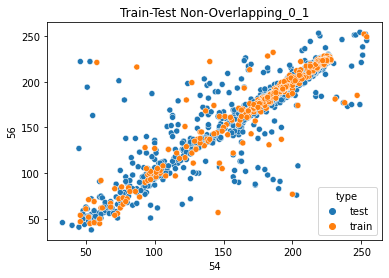

In [39]:
gen_scatter(x_train_nonover_01,x_test_nonover_01, '54', '56', 'Train-Test Non-Overlapping_0_1')

2021-10-25 16:05:01,486 [1437] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



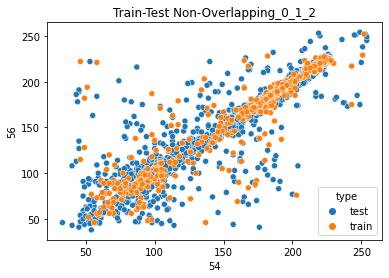

In [40]:
gen_scatter(x_train_nonover_012,x_test_nonover_012, '54', '56', 'Train-Test Non-Overlapping_0_1_2')

2021-10-25 16:05:32,379 [1437] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



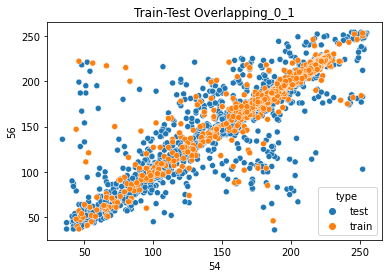

In [41]:
gen_scatter(x_train_over_01,x_test_over_01, '54', '56', 'Train-Test Overlapping_0_1')

2021-10-25 16:05:55,766 [1437] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



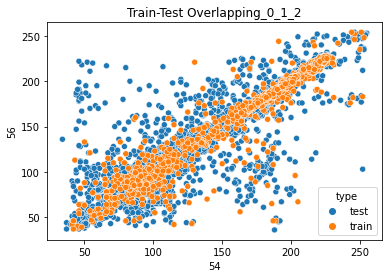

In [42]:
gen_scatter(x_train_over_012,x_test_over_012, '54', '56', 'Train-Test Overlapping_0_1_2')

In [83]:
#function for feature selection
def feature_selection(x_train, y_train, x_test):
    sel = SelectFromModel(SGDClassifier(max_iter=1000, tol=1e-3,loss="log", penalty="elasticnet"))
    sel.fit(x_train, y_train)
    x_train_rcf = sel.transform(x_train)
    x_test_rcf = sel.transform(x_test)
    print(x_train.columns[sel.get_support()])
    return x_train_rcf, x_test_rcf

#function to scale data
def scale_data(x_train, x_test):
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        return x_train, x_test

#elastic_classifier with given x and y data
def Elastic_Classifier(x_train, y_train, x_test, y_test):
    clf = SGDClassifier(max_iter=1000, tol=1e-3,loss="log", penalty="elasticnet")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print("Accuracy : ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

    class_names = [0,1]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    return plt.show()
    
    
    
#function for feature selection for random forest
def feature_selection_rm(x_train, y_train, x_test):
#     sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
    sel = SelectFromModel(AdaBoostRegressor(random_state=3, n_estimators=50))
    sel.fit(x_train, y_train)
    x_train_rcf = sel.transform(x_train)
    x_test_rcf = sel.transform(x_test)
    return x_train_rcf, x_test_rcf

#generate random forest model with given x and y test dataset
def Random_forest(x_train, y_train, x_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_depth = 110, min_samples_leaf = 4
                             , min_samples_split = 10, random_state=0, n_jobs=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
  

    print("Accuracy : ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    if(len(y_test.unique()) == 2):
        class_names = [0,1]
    else:
        class_names = [0,1,2]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    return plt.show()
    

## Elastic Net Classifier 

### Non-Overlapping Image 1 and 0

In [101]:
x_train, x_test = feature_selection(x_train_nonover_01,y_train_nonover_01,x_test_nonover_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

Index(['1', '2', '3', '4', '6', '7', '9', '10', '13', '19', '26', '27', '33',
       '38', '42', '43', '44', '46', '47', '49', '51', '55', '56', '60', '61',
       '62'],
      dtype='object')


Accuracy :  0.573502722323049
              precision    recall  f1-score   support

           0       0.72      0.22      0.34       272
           1       0.55      0.91      0.68       279

    accuracy                           0.57       551
   macro avg       0.63      0.57      0.51       551
weighted avg       0.63      0.57      0.52       551



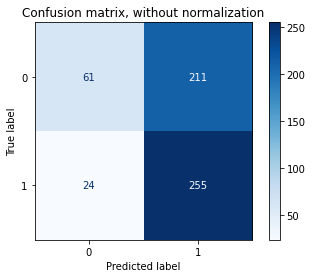

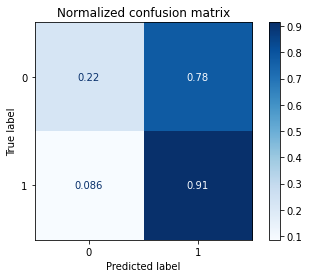

In [105]:
Elastic_Classifier(x_train, y_train_nonover_01, x_test, y_test_nonover_01)

Accuracy :  0.6460980036297641
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       272
           1       0.69      0.54      0.61       279

    accuracy                           0.65       551
   macro avg       0.65      0.65      0.64       551
weighted avg       0.66      0.65      0.64       551



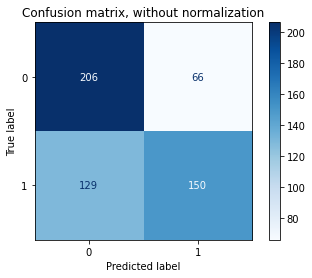

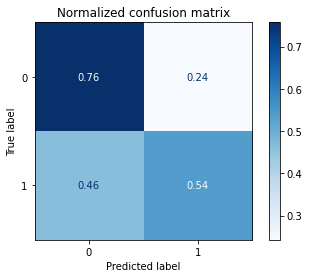

In [111]:
Elastic_Classifier(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)

### Overlapping Image 1 and 0

In [88]:
x_train, x_test = feature_selection(x_train_over_01,y_train_over_01,x_test_over_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

Index(['1', '2', '7', '10', '11', '15', '18', '20', '23', '24', '25', '32',
       '33', '39', '42', '43', '44', '46', '47', '49', '50', '51', '53', '55',
       '57', '58', '59'],
      dtype='object')


2021-10-25 16:34:01,457 [1437] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy :  0.5117647058823529
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       664
           1       0.51      1.00      0.68       696

    accuracy                           0.51      1360
   macro avg       0.26      0.50      0.34      1360
weighted avg       0.26      0.51      0.35      1360



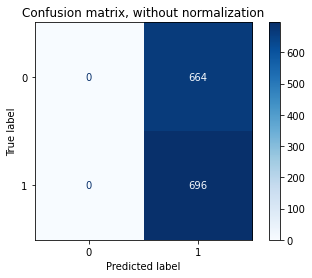

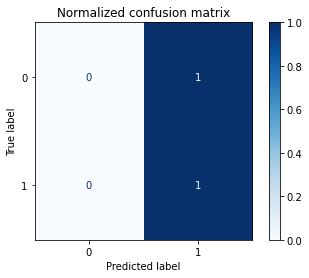

In [89]:
Elastic_Classifier(x_train, y_train_over_01, x_test, y_test_over_01)

Accuracy :  0.6411764705882353
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       664
           1       0.69      0.55      0.61       696

    accuracy                           0.64      1360
   macro avg       0.65      0.64      0.64      1360
weighted avg       0.65      0.64      0.64      1360



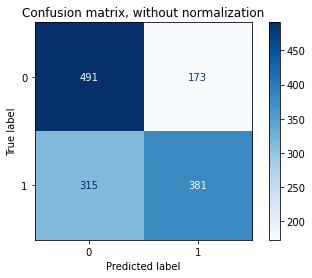

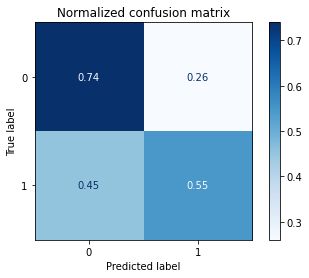

In [90]:
Elastic_Classifier(x_train_scaled, y_train_over_01, x_test_scaled, y_test_over_01)

## Random Forest Classifier

### Non-Overlapping Image 0 1

Accuracy :  0.9237749546279492
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       272
           1       0.89      0.96      0.93       279

    accuracy                           0.92       551
   macro avg       0.93      0.92      0.92       551
weighted avg       0.93      0.92      0.92       551



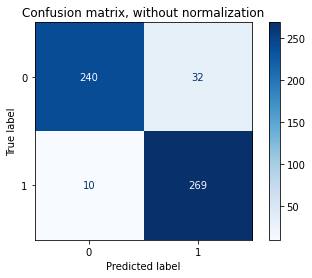

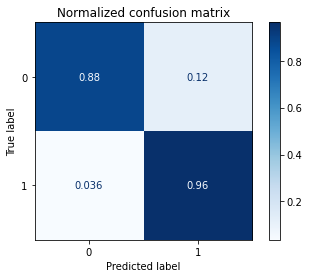

Accuracy :  0.9237749546279492
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       272
           1       0.89      0.96      0.93       279

    accuracy                           0.92       551
   macro avg       0.93      0.92      0.92       551
weighted avg       0.93      0.92      0.92       551



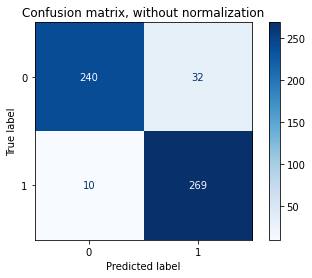

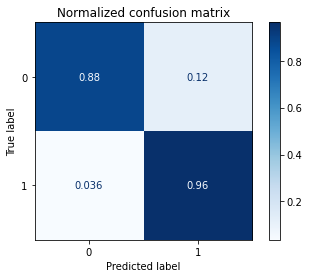

In [91]:
x_train, x_test = feature_selection_rm(x_train_nonover_01,y_train_nonover_01,x_test_nonover_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on nonscalle data 
Random_forest(x_train, y_train_nonover_01, x_test, y_test_nonover_01)

#train test on scale data
Random_forest(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)

### Overlapping Image 0 1

Accuracy :  0.9227941176470589
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       664
           1       0.90      0.96      0.93       696

    accuracy                           0.92      1360
   macro avg       0.92      0.92      0.92      1360
weighted avg       0.92      0.92      0.92      1360



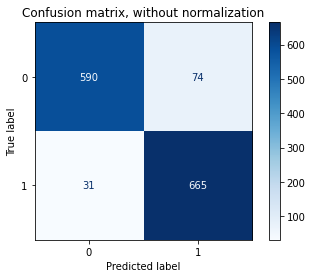

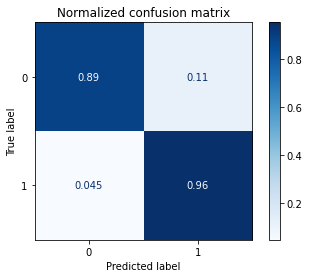

Accuracy :  0.9235294117647059
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       664
           1       0.90      0.96      0.93       696

    accuracy                           0.92      1360
   macro avg       0.93      0.92      0.92      1360
weighted avg       0.93      0.92      0.92      1360



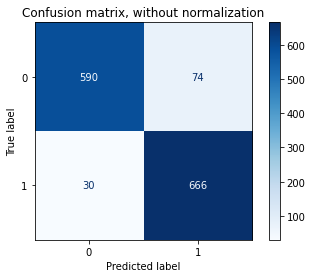

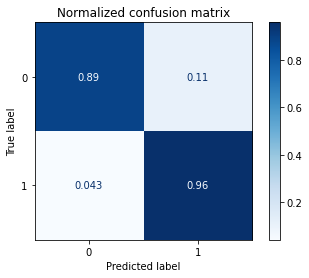

In [92]:
x_train, x_test = feature_selection_rm(x_train_over_01,y_train_over_01,x_test_over_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on non scale data
Random_forest(x_train, y_train_over_01, x_test, y_test_over_01)

#train test on scale data
Random_forest(x_train_scaled, y_train_over_01, x_test_scaled, y_test_over_01)

### Non-overlapping image 0,1,2

Accuracy :  0.7796610169491526
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       281
           1       0.74      0.79      0.76       279
           2       0.73      0.80      0.76       266

    accuracy                           0.78       826
   macro avg       0.79      0.78      0.78       826
weighted avg       0.79      0.78      0.78       826



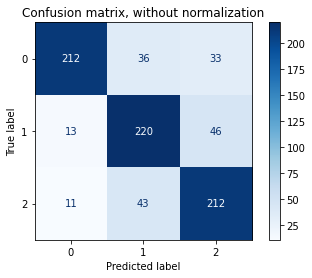

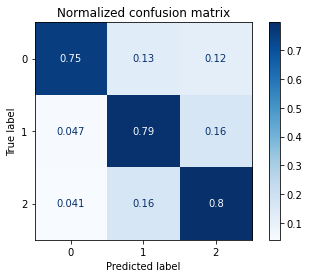

Accuracy :  0.7808716707021792
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       281
           1       0.74      0.79      0.76       279
           2       0.73      0.80      0.76       266

    accuracy                           0.78       826
   macro avg       0.79      0.78      0.78       826
weighted avg       0.79      0.78      0.78       826



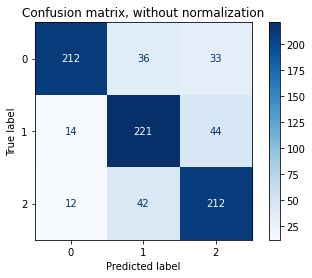

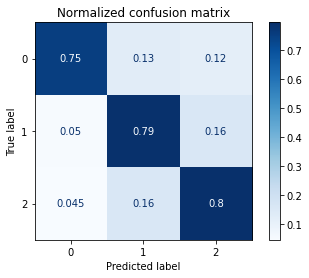

In [96]:
x_train, x_test = feature_selection_rm(x_train_nonover_012,y_train_nonover_012,x_test_nonover_012)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on nonscalle data 
Random_forest(x_train, y_train_nonover_012, x_test, y_test_nonover_012)

#train test on scale data
Random_forest(x_train_scaled, y_train_nonover_012, x_test_scaled, y_test_nonover_012)

### Overlapping image 0,1,2

Accuracy :  0.8348039215686275
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       677
           1       0.77      0.88      0.82       693
           2       0.82      0.81      0.81       670

    accuracy                           0.83      2040
   macro avg       0.84      0.83      0.84      2040
weighted avg       0.84      0.83      0.84      2040



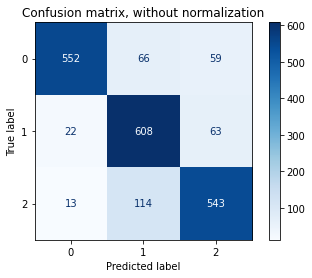

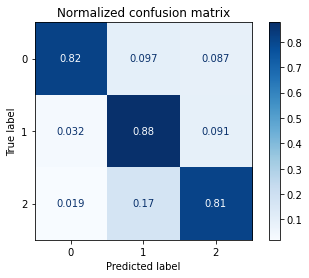

Accuracy :  0.8357843137254902
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       677
           1       0.77      0.88      0.82       693
           2       0.82      0.81      0.81       670

    accuracy                           0.84      2040
   macro avg       0.84      0.84      0.84      2040
weighted avg       0.84      0.84      0.84      2040



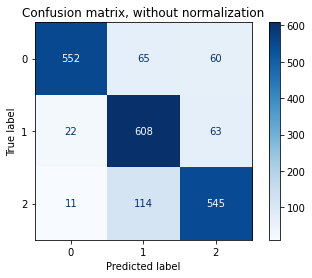

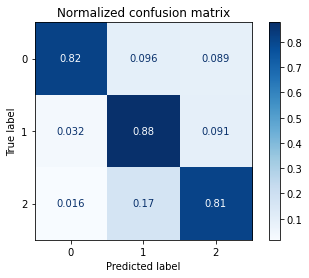

In [95]:
x_train, x_test = feature_selection_rm(x_train_over_012,y_train_over_012,x_test_over_012)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on nonscalle data 
Random_forest(x_train, y_train_over_012, x_test, y_test_over_012)

#train test on scale data
Random_forest(x_train_scaled, y_train_over_012, x_test_scaled, y_test_over_012)